## About Dataset

Mastercard Inc. (stylized as MasterCard from 1979 to 2016 and MasterCard since 2016) is an American multinational financial services corporation headquartered in the Mastercard International Global Headquarters in Purchase, New York. The Global Operations Headquarters is located in O'Fallon, Missouri, a municipality of St. Charles County, Missouri. Throughout the world, its principal business is to process payments between the banks of merchants and the card-issuing banks or credit unions of the purchasers who use the "Mastercard" brand debit, credit, and prepaid cards to make purchases. Mastercard Worldwide has been a publicly traded company since 2006. Prior to its initial public offering, Mastercard Worldwide was a cooperative owned by the more than 25,000 financial institutions that issue its branded cards.

Mastercard, originally known as Interbank from 1966 to 1969 and Master Charge from 1969 to 1979, was created by an alliance of several regional bank card associations in response to the BankAmericard issued by Bank of America, which later became the Visa credit card issued by Visa Inc.

Mastercard is one of the best performing stocks of the decade of 2011-2020

## Project Content 

Our dataset contains many different attributes of Mastercard such as date, opening price, high value, low value, closing price and trading volume. These attributes contain important information that can be used to predict Mastercard stock prices.

We examine our dataset through pre-processing. This is important to ensure that our data is processed and analyzed correctly. In this process, we have properly cleaned our data, completed missing data and visualized our data. This will ensure that our dataset is used correctly.

We developed a model using regression method and tried to predict the closing prices. Regression analysis is a statistical method used to analyze the relationship between variables. This method can be used to predict closing prices using the variables in Mastercard stock prices.

To improve the accuracy of our model, we processed our data correctly, took care to choose an appropriate regression algorithm, and removed redundant features. We also separated our data correctly when training our model and took care to use appropriate metrics to test our model.

As a result, by building a regression model using this dataset, we tried to predict Mastercard stock prices. This can help investors predict future prices and help them manage their investments more effectively.

In [1]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install xgboost

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LinearRegression 
lr = LinearRegression()
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

from sklearn.linear_model import Ridge, Lasso
R = Ridge()
L= Lasso()
from sklearn.linear_model import ElasticNet
E = ElasticNet(l1_ratio=.9)
from sklearn.tree import ExtraTreeRegressor
ETR = ExtraTreeRegressor()

from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor()
from sklearn.neighbors import KNeighborsRegressor
est = KNeighborsRegressor()

from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf

import xgboost as xgb

import os
tf.__version__

'2.11.0-dev20220812'

In [4]:
df=pd.read_csv('mastercard.csv')

### EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3872 entries, 0 to 3871
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          3872 non-null   object 
 1   Open          3872 non-null   float64
 2   High          3872 non-null   float64
 3   Low           3872 non-null   float64
 4   Close         3872 non-null   float64
 5   Volume        3872 non-null   int64  
 6   Dividends     3872 non-null   float64
 7   Stock Splits  3872 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 242.1+ KB


In [6]:
df.head()

Date      Open      High       Low     Close     Volume  Dividends  \
0  2006-05-25  3.748967  4.283869  3.739664  4.279217  395343000        0.0   
1  2006-05-26  4.307126  4.348058  4.103398  4.179680  103044000        0.0   
2  2006-05-30  4.183400  4.184330  3.986184  4.093164   49898000        0.0   
3  2006-05-31  4.125723  4.219679  4.125723  4.180608   30002000        0.0   
4  2006-06-01  4.179678  4.474572  4.176887  4.419686   62344000        0.0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0

In [7]:
df.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [8]:
df.sample(5)

Date        Open        High         Low       Close    Volume  \
869   2009-11-05   21.462823   21.675568   21.137116   21.674627  18812000   
3792  2021-06-18  361.237465  369.477344  361.117762  366.524567   5009400   
1571  2012-08-20   40.469755   40.611889   40.146642   40.479233   4384000   
870   2009-11-06   21.440232   22.326986   21.395048   22.300629  24834000   
2207  2015-03-04   86.918610   88.117289   86.429547   87.944679   4733900   

      Dividends  Stock Splits  
869         0.0           0.0  
3792        0.0           0.0  
1571        0.0           0.0  
870         0.0           0.0  
2207        0.0           0.0

In [9]:
abs(df.corr()['Close']).sort_values(ascending=False)

Close           1.000000
Low             0.999904
High            0.999878
Open            0.999785
Volume          0.386453
Dividends       0.090125
Stock Splits    0.003862
Name: Close, dtype: float64

In [10]:
df.describe()

Open         High          Low        Close        Volume  \
count  3872.000000  3872.000000  3872.000000  3872.000000  3.872000e+03   
mean    104.896814   105.956054   103.769349   104.882714  1.232250e+07   
std     106.245511   107.303589   105.050064   106.168693  1.759665e+07   
min       3.748967     4.102467     3.739664     4.083861  6.411000e+05   
25%      22.347203    22.637997    22.034458    22.300391  3.529475e+06   
50%      70.810079    71.375896    70.224002    70.856083  5.891750e+06   
75%     147.688448   148.645373   146.822013   147.688438  1.319775e+07   
max     392.653890   400.521479   389.747812   394.685730  3.953430e+08   

         Dividends  Stock Splits  
count  3872.000000   3872.000000  
mean      0.002329      0.002583  
std       0.025851      0.160706  
min       0.000000      0.000000  
25%       0.000000      0.000000  
50%       0.000000      0.000000  
75%       0.000000      0.000000  
max       0.440000     10.000000

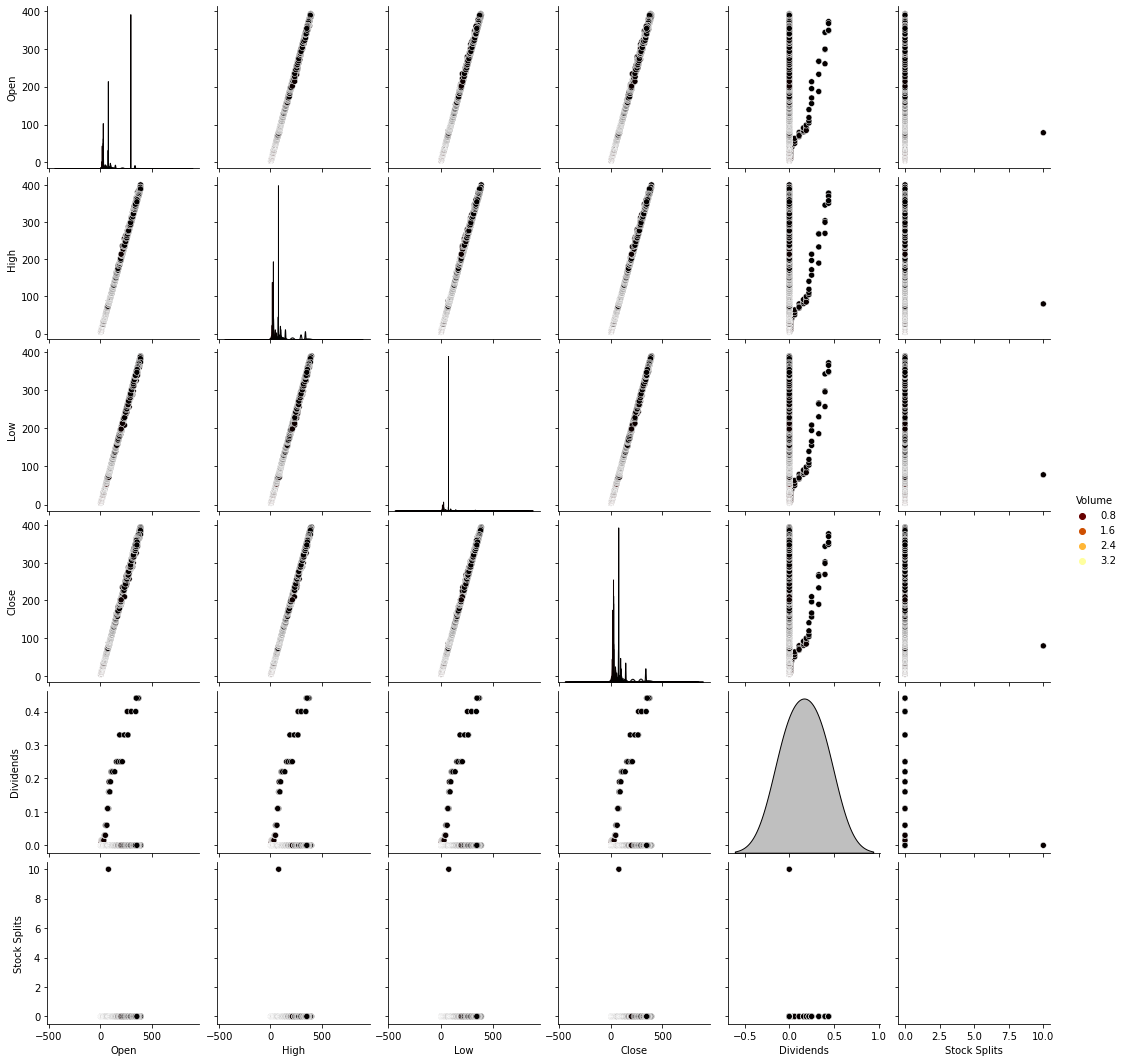

In [11]:
sns.pairplot(df, hue='Volume',palette='afmhot',size=2.5)

In [12]:
df.drop(['Volume', 'Dividends', 'Stock Splits'], axis=1, inplace=True)
df.head(3)

Date      Open      High       Low     Close
0  2006-05-25  3.748967  4.283869  3.739664  4.279217
1  2006-05-26  4.307126  4.348058  4.103398  4.179680
2  2006-05-30  4.183400  4.184330  3.986184  4.093164

In [13]:
stocks_to_visualization = df
stocks_to_visualization['Date'] = pd.DatetimeIndex(df['Date'])
stocks_to_visualization.set_index('Date', drop=True, inplace=True)
stocks_to_visualization.head(3)

Open      High       Low     Close
Date                                              
2006-05-25  3.748967  4.283869  3.739664  4.279217
2006-05-26  4.307126  4.348058  4.103398  4.179680
2006-05-30  4.183400  4.184330  3.986184  4.093164

In [14]:
stocks_to_visualization.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3872 entries, 2006-05-25 to 2021-10-11
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3872 non-null   float64
 1   High    3872 non-null   float64
 2   Low     3872 non-null   float64
 3   Close   3872 non-null   float64
dtypes: float64(4)
memory usage: 151.2 KB


### DATA VISUALIZATION 

In [15]:
sns.set_theme(style='darkgrid')

In [16]:
open_column = stocks_to_visualization['Open']
high_column = stocks_to_visualization['High']
low_column = stocks_to_visualization['Low']
close_column = stocks_to_visualization['Close']

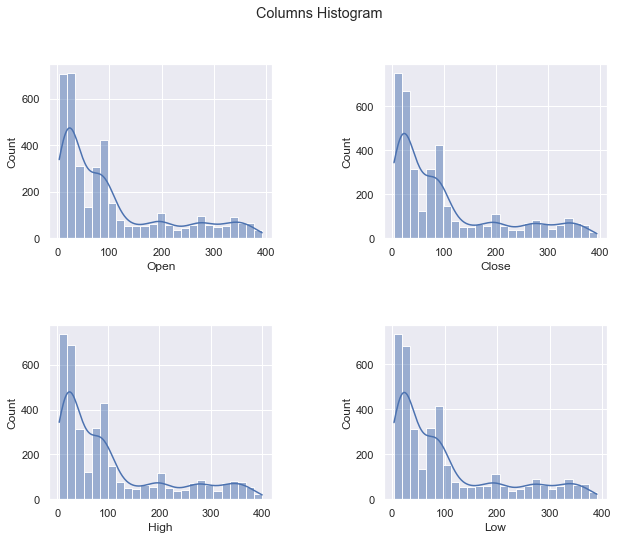

In [17]:
fig, [[ax_open, ax_close], 
      [ax_high, ax_low]] = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
plt.suptitle('Columns Histogram')
sns.histplot(open_column, kde=True, ax=ax_open)
sns.histplot(close_column, kde=True, ax=ax_close)
sns.histplot(high_column, kde=True, ax=ax_high)
sns.histplot(low_column, kde=True, ax=ax_low)
plt.subplots_adjust(wspace=0.5,  
                    hspace=0.5)

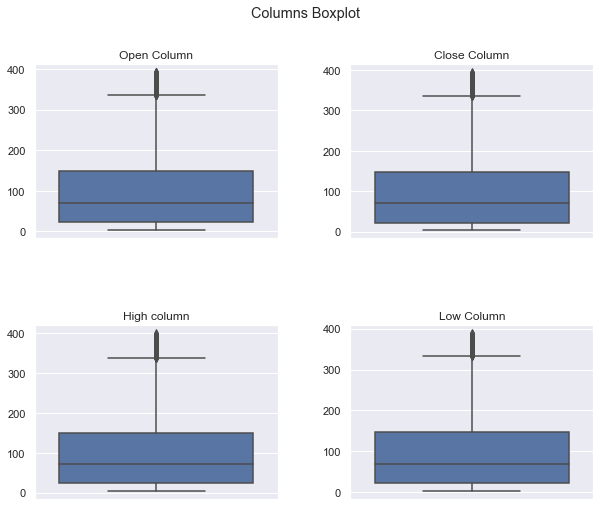

In [18]:
fig, [[ax_open, ax_close], 
      [ax_high, ax_low]] = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
plt.suptitle('Columns Boxplot')
sns.boxplot(data=open_column, ax=ax_open)
ax_open.set_title('Open Column')
sns.boxplot(data=close_column, ax=ax_close)
ax_close.set_title('Close Column')
sns.boxplot(data=high_column, ax=ax_high)
ax_high.set_title('High column')
sns.boxplot(data=low_column, ax=ax_low)
ax_low.set_title('Low Column')
plt.subplots_adjust(wspace=0.3,  
                    hspace=0.5)

for axis in ax_open, ax_close, ax_high, ax_low:
    axis.get_xaxis().set_visible(b=False)

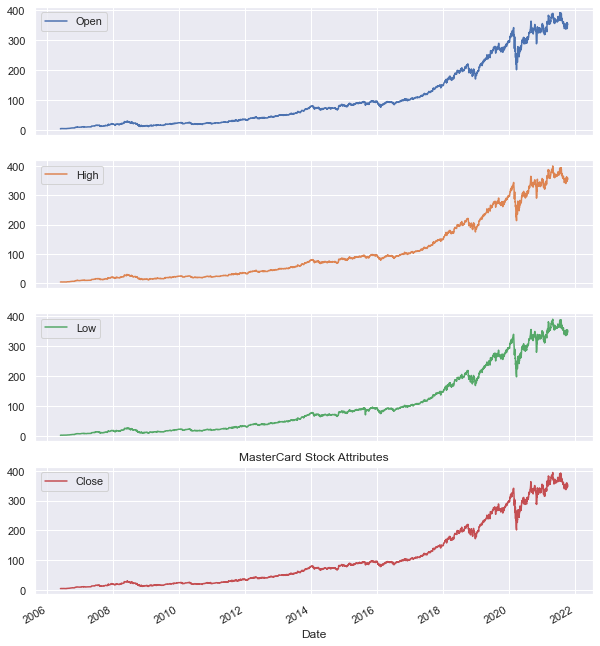

In [19]:
df.plot(subplots = True, figsize = (10,12))
plt.title('MasterCard Stock Attributes')
plt.show()

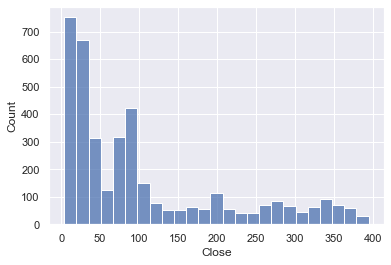

In [20]:
sns.histplot(df['Close']);

In [21]:
np.arange(1, len(df.columns))

array([1, 2, 3])

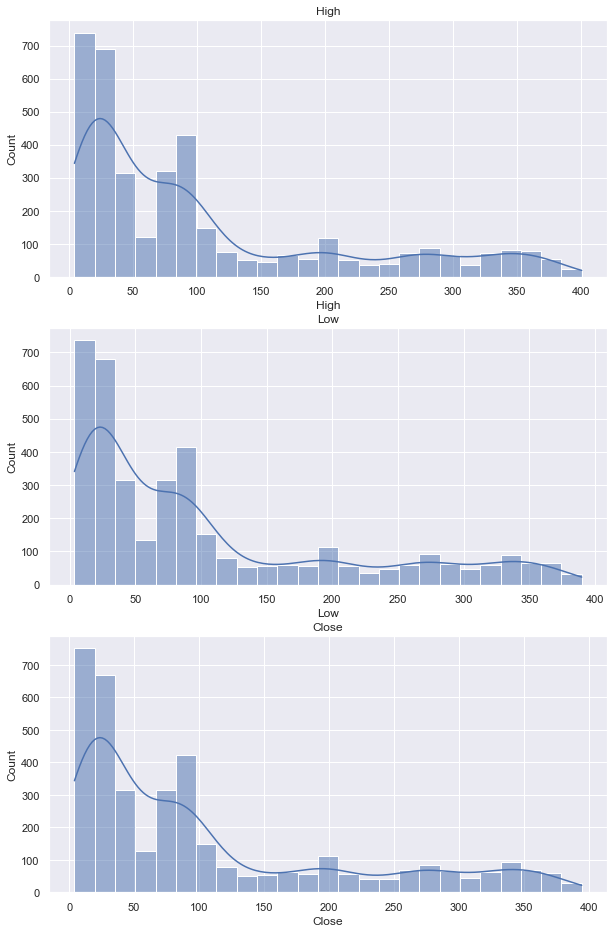

In [22]:
plt.figure(figsize=(10,50))
i = 1
for i in np.arange(1, len(df.columns)):
  plt.subplot(9, 1, i + 1)
  sns.histplot(df[df.columns[i]], kde = True)
  plt.title(df.columns[i])

In [23]:
df['Close'].describe()

count    3872.000000
mean      104.882714
std       106.168693
min         4.083861
25%        22.300391
50%        70.856083
75%       147.688438
max       394.685730
Name: Close, dtype: float64

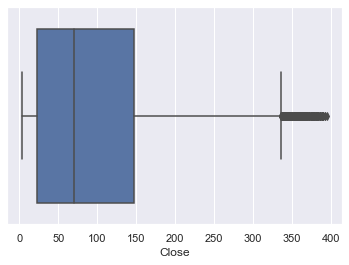

In [24]:
sns.boxplot(x = df['Close']);

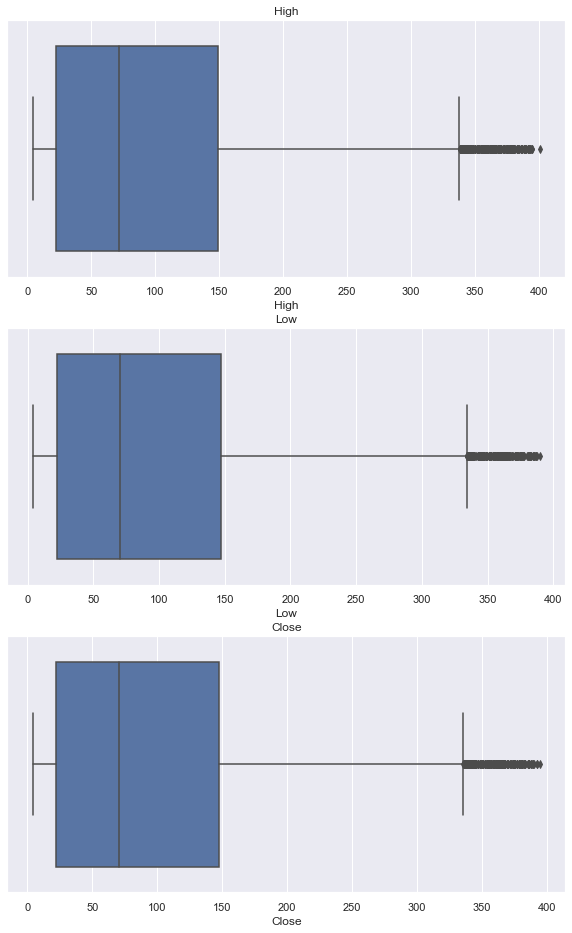

In [25]:
plt.figure(figsize=(10,50))
i = 1
for i in np.arange(1, len(df.columns)):
  plt.subplot(9, 1, i + 1)
  sns.boxplot(x = df[df.columns[i]])
  plt.title(df.columns[i])

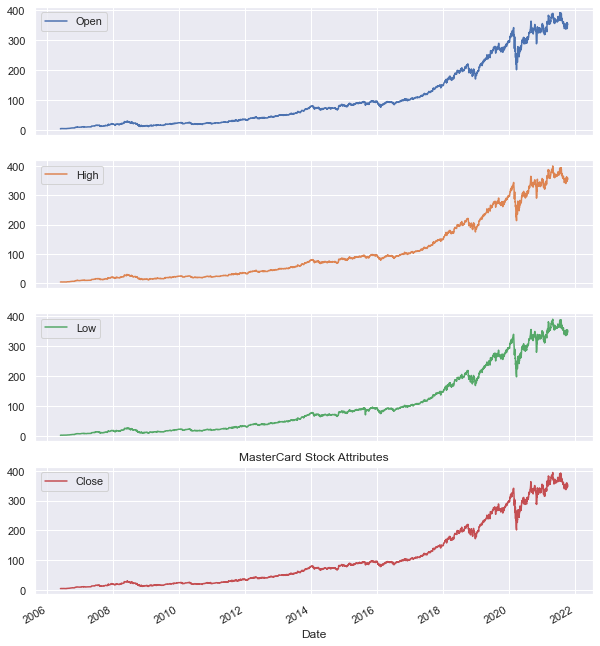

In [26]:
df.plot(subplots = True, figsize = (10,12))
plt.title('MasterCard Stock Attributes')
plt.show()

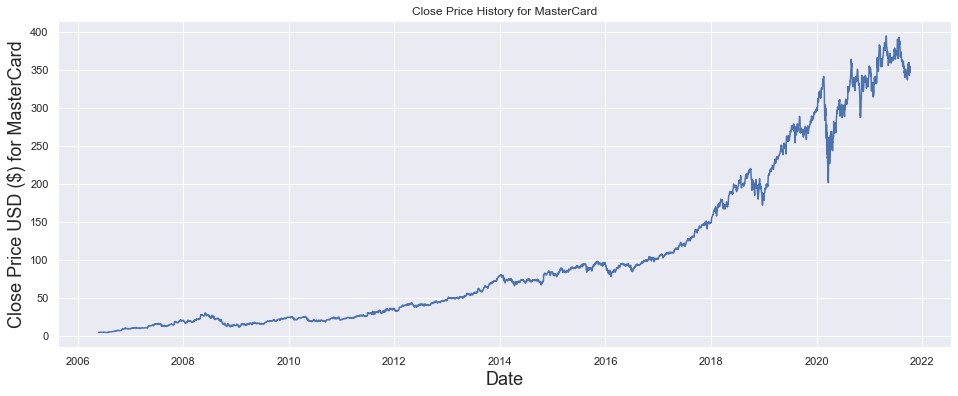

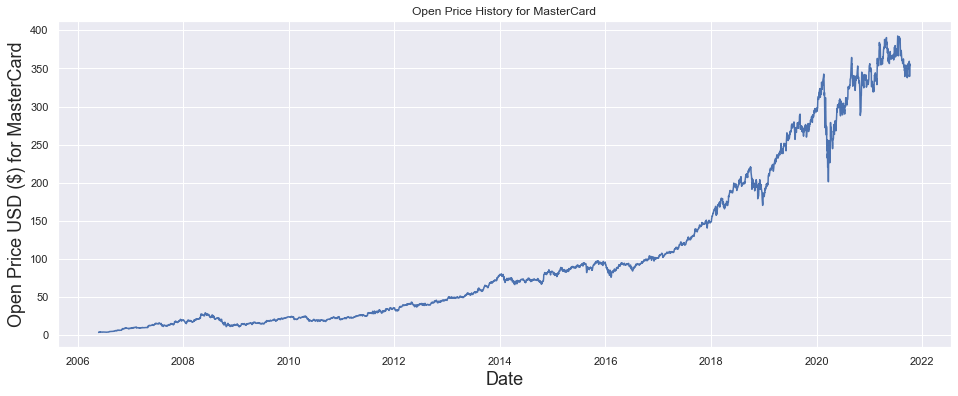

In [27]:
def plot_close_val(data_frame, column, stock):
    plt.figure(figsize=(16,6))
    plt.title(column + ' Price History for ' + stock )
    plt.plot(data_frame[column])
    plt.xlabel('Date', fontsize=18)
    plt.ylabel(column + ' Price USD ($) for ' + stock, fontsize=18)
    plt.show()

plot_close_val(df, 'Close', 'MasterCard')
plot_close_val(df, 'Open',  'MasterCard')

<AxesSubplot:xlabel='Date'>

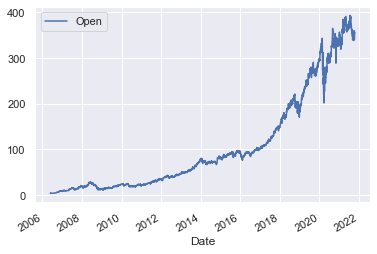

In [28]:
df[["Open"]].plot()

In [29]:
import plotly.graph_objects as go

df=df.reset_index()

fig = go.Figure(data=go.Ohlc(x=df['Date'],
        open=df['Open'],
        high=df['High'],
        low=df['Low'],
        close=df['Close']))
fig.show()

### REGRESSION

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3872 entries, 0 to 3871
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3872 non-null   datetime64[ns]
 1   Open    3872 non-null   float64       
 2   High    3872 non-null   float64       
 3   Low     3872 non-null   float64       
 4   Close   3872 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 151.4 KB


In [31]:
x = df[['Open','High','Low']]

In [32]:
y = df[['Close']]

In [33]:
df.shape

(3872, 5)

In [34]:
x.shape

(3872, 3)

In [35]:
y.shape

(3872, 1)

In [36]:
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=13)

In [37]:
x_train.shape, x_test.shape,y_train.shape, y_test.shape 

((3097, 3), (775, 3), (3097, 1), (775, 1))

In [38]:
regmodel = lr.fit(x_train,y_train)

In [39]:
y_pretest = regmodel.predict(x_test)
y_pretest

array([[ 95.42989789],
       [ 20.44452079],
       [ 19.13332749],
       [ 93.85779881],
       [ 49.36874423],
       [ 13.35625325],
       [ 23.37323392],
       [233.74125067],
       [ 80.42093434],
       [383.56846754],
       [ 85.63168968],
       [338.52587685],
       [ 15.4963924 ],
       [ 24.57408405],
       [ 64.66093396],
       [150.57078191],
       [102.43741789],
       [ 55.05290447],
       [ 92.36259244],
       [  4.23195761],
       [ 87.64865609],
       [ 13.59341786],
       [ 94.2591403 ],
       [294.15590888],
       [ 19.42433399],
       [  5.16980363],
       [ 72.98220577],
       [ 83.34623141],
       [185.43264816],
       [ 20.86543435],
       [ 79.57220434],
       [106.77481953],
       [ 45.37265985],
       [ 22.65218441],
       [ 72.08953789],
       [273.37245998],
       [263.96753165],
       [ 27.13702783],
       [ 23.91311335],
       [ 95.75996542],
       [109.67226908],
       [ 61.83283175],
       [  4.97068964],
       [ 48

In [40]:
y_pretest = regmodel.predict(x_test)
y_pretest

array([[ 95.42989789],
       [ 20.44452079],
       [ 19.13332749],
       [ 93.85779881],
       [ 49.36874423],
       [ 13.35625325],
       [ 23.37323392],
       [233.74125067],
       [ 80.42093434],
       [383.56846754],
       [ 85.63168968],
       [338.52587685],
       [ 15.4963924 ],
       [ 24.57408405],
       [ 64.66093396],
       [150.57078191],
       [102.43741789],
       [ 55.05290447],
       [ 92.36259244],
       [  4.23195761],
       [ 87.64865609],
       [ 13.59341786],
       [ 94.2591403 ],
       [294.15590888],
       [ 19.42433399],
       [  5.16980363],
       [ 72.98220577],
       [ 83.34623141],
       [185.43264816],
       [ 20.86543435],
       [ 79.57220434],
       [106.77481953],
       [ 45.37265985],
       [ 22.65218441],
       [ 72.08953789],
       [273.37245998],
       [263.96753165],
       [ 27.13702783],
       [ 23.91311335],
       [ 95.75996542],
       [109.67226908],
       [ 61.83283175],
       [  4.97068964],
       [ 48

In [41]:
(mean_squared_error(y_test, y_pretest)) ** 0.5

0.9409998002517044

In [42]:
r2_score( y_pretest,y_test)

0.9999115353582545

In [43]:
R.fit(x_train, y_train)
y_pred_ridge = R.predict(x_test)

In [44]:
(mean_squared_error(y_test, y_pred_ridge))**0.5

0.9409768646005677

In [45]:
r2_score(y_test, y_pred_ridge)

0.9999114587125725

In [46]:
L.fit(x_train, y_train)
y_pred_lasso = L.predict(x_test)

In [47]:
y_pred_lasso

array([ 94.94254678,  20.56341373,  19.095131  ,  94.09145695,
        49.05565526,  13.14641559,  23.32885483, 232.28898407,
        82.77606336, 383.5682507 ,  85.4813924 , 340.01375256,
        15.2860597 ,  24.46980895,  64.41872812, 150.69916008,
       102.12005735,  54.57510048,  91.56273063,   4.17367982,
        88.41951184,  14.12602821,  93.95079861, 291.64099441,
        20.02810163,   5.21018032,  72.61225873,  82.81448217,
       184.78932243,  21.33802479,  79.04670152, 106.80643968,
        45.15641244,  22.40964781,  71.99528531, 275.51293939,
       269.55530299,  27.28645409,  23.58218695,  96.1782274 ,
       109.06675539,  61.30774232,   4.99463778,  49.71243048,
        63.25714909,  79.82880968,  24.06726253,  86.86601663,
        86.36355015,  99.78464511, 119.02013053,  39.27318684,
       203.05847494,  73.13320878,  24.79803322,  39.99155393,
       146.07190337,  33.25497849,  13.22951582,  14.62218039,
        15.78140043,  66.06186744,  70.89335743, 172.33

In [48]:
(mean_squared_error(y_test, y_pred_lasso))**0.5

1.5433817836972443

In [49]:
r2_score(y_test,  y_pred_lasso)

0.999761803881015

In [50]:
E.fit(x_train,y_train)
y_pred_elastic = E.predict(x_test)

In [51]:
(mean_squared_error(y_test, y_pred_elastic))**0.5

1.5381327568401688

In [52]:
r2_score(y_test, y_pred_elastic)

0.9997634213313612

In [53]:
ETR.fit(x_train,y_train)
y_pred_etr = ETR.predict(x_test)

In [54]:
(mean_squared_error(y_test, y_pred_etr))**0.5

1.4876814950262056

In [55]:
r2_score(y_test, y_pred_etr)

0.9997786865221917

In [56]:
GBR.fit(x_train,y_train)
y_pred_gbr =GBR.predict(x_test)

In [57]:
(mean_squared_error(y_test, y_pred_gbr))**0.5

1.417836822350951

In [58]:
r2_score(y_test, y_pred_gbr)

0.9997989794562967

In [59]:
model=est.fit(x_train,y_train)

In [60]:
y_pred_knb = model.predict(x_test)

In [61]:
(mean_squared_error(y_test, y_pred_knb))**0.5

1.1405733568436307

In [62]:
r2_score(y_test, y_pred_knb)

0.9998699128539219

### Long Way- İnvest in open

In [63]:
x1,y1= df[['Open']],df[['Close']]

In [64]:
x1_train, x1_test,y1_train, y1_test = train_test_split(x1,y1,test_size=0.20,random_state=13)

In [65]:
regmodel = lr.fit(x1_train,y1_train)

In [66]:
y1_pretest = regmodel.predict(x1_test)
y1_pretest

array([[ 94.77197842],
       [ 20.5807328 ],
       [ 19.1038755 ],
       [ 94.19968667],
       [ 49.02263318],
       [ 13.07949861],
       [ 23.34787912],
       [232.15604717],
       [ 83.09921033],
       [383.63588183],
       [ 85.50173553],
       [340.39008996],
       [ 15.24672179],
       [ 24.45951402],
       [ 64.41861389],
       [150.82275516],
       [102.1415768 ],
       [ 54.49699447],
       [ 91.4460801 ],
       [  4.17130501],
       [ 88.60792608],
       [ 14.18335481],
       [ 93.98164892],
       [291.2528917 ],
       [ 20.12726691],
       [  5.23625928],
       [ 72.6070223 ],
       [ 82.722867  ],
       [184.78231959],
       [ 21.42923164],
       [ 78.99046824],
       [106.89832848],
       [ 45.1409074 ],
       [ 22.37768781],
       [ 72.0246526 ],
       [276.02761674],
       [270.31565233],
       [ 27.30779212],
       [ 23.51896617],
       [ 96.33742029],
       [109.01871486],
       [ 61.24173701],
       [  5.00579878],
       [ 49

In [67]:
(mean_squared_error(y1_test, y1_pretest)) ** 0.5

1.752607036652826

In [68]:
r2_score(y1_test, y1_pretest)

0.9996928453863317

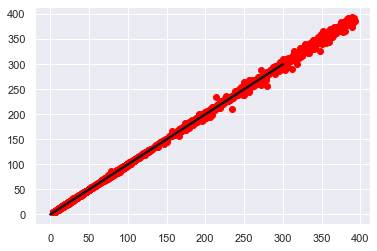

In [69]:
plt.scatter(x1,y1,color='red')
b,a=np.polyfit(x1.values.reshape(3872),y1.values.reshape(3872),deg=1)
xseq=np.linspace(0,300, num=100)
plt.plot(xseq,a + b * xseq,color='k',lw=2.5);

In [70]:
R.fit(x1_train, y1_train)
y1_pred_ridge = R.predict(x1_test)

L.fit(x1_train, y1_train)
y1_pred_lasso = L.predict(x1_test)

E.fit(x1_train, y1_train)
y1_pred_elastic = E.predict(x1_test)

ETR.fit(x1_train, y1_train)
y1_pred_etr = ETR.predict(x1_test)

GBR.fit(x1_train, y1_train)
y1_pred_gbr =GBR.predict(x1_test)

In [71]:
(mean_squared_error(y1_test, y1_pred_ridge))**0.5

1.752607141932802

In [72]:
r2_score(y1_test, y1_pred_ridge)

0.9996928453494299

In [73]:
(mean_squared_error(y1_test, y1_pred_lasso))**0.5

1.75295496104447

In [74]:
r2_score(y1_test,  y1_pred_lasso)

0.9996927234226658

In [75]:
(mean_squared_error(y1_test, y1_pred_elastic))**0.5

1.7529549187255136

In [76]:
r2_score(y1_test, y1_pred_elastic)

0.999692723437502

In [77]:
(mean_squared_error(y1_test, y1_pred_etr))**0.5

2.7336190998533674

In [78]:
r2_score(y1_test, y1_pred_etr)

0.9992527534106388

In [79]:
(mean_squared_error(y1_test, y1_pred_gbr))**0.5

1.9316155953726286

In [80]:
r2_score(y1_test, y1_pred_gbr)

0.9996268964792122

### Long Way- İnvest in high

In [81]:
x2,y2= df[['High']],df[['Close']]

In [82]:
x2_train, x2_test,y2_train, y2_test = train_test_split(x2,y2,test_size=0.20,random_state=13)

In [83]:
regmodel = lr.fit(x2_train,y2_train)

In [84]:
ETR.fit(x2_train,y2_train)
y2_pred_etr = ETR.predict(x2_test)

In [85]:
y2_pretest = regmodel.predict(x2_test)
y2_pretest

array([[ 95.7992449 ],
       [ 20.66614016],
       [ 19.12037172],
       [ 93.50833564],
       [ 49.1005515 ],
       [ 13.59333125],
       [ 23.26479638],
       [231.77864477],
       [ 82.53628165],
       [382.66154674],
       [ 85.22098983],
       [338.20735181],
       [ 15.5213973 ],
       [ 24.57028702],
       [ 64.25844269],
       [149.82226454],
       [101.67348618],
       [ 54.80091367],
       [ 91.73049801],
       [  4.28575546],
       [ 87.73299755],
       [ 14.31614389],
       [ 93.45383231],
       [291.99453918],
       [ 19.959479  ],
       [  5.19672367],
       [ 72.36154435],
       [ 83.05217243],
       [184.14001034],
       [ 21.20708363],
       [ 79.02861111],
       [106.14280295],
       [ 45.16369472],
       [ 22.54953533],
       [ 71.73761509],
       [273.35476645],
       [268.71846213],
       [ 27.37726507],
       [ 23.87504291],
       [ 95.37719711],
       [108.87033077],
       [ 61.38918604],
       [  5.07894222],
       [ 49

In [86]:
(mean_squared_error(y2_test, y2_pred_etr))**0.5

2.1769303692806234

In [87]:
r2_score(y2_test, y2_pred_etr)

0.9995261105753138

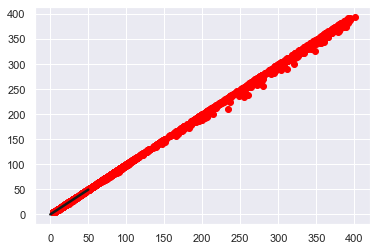

In [88]:
plt.scatter(x2,y2,color='red')
b,a=np.polyfit(x2.values.reshape(3872),y2.values.reshape(3872),deg=1)
xseq=np.linspace(0,50, num=100)
plt.plot(xseq,a + b * xseq,color='k',lw=2.5);

### Long Way- İnvest in Social low

In [89]:
x3,y3= df[['Low']],df[['Close']]

In [90]:
x3_train, x3_test,y3_train, y3_test = train_test_split(x3,y3,test_size=0.20,random_state=13)

In [91]:
regmodel = lr.fit(x3_train,y3_train)

In [92]:
ETR.fit(x3_train,y3_train)
y3_pred_etr = ETR.predict(x3_test)

In [93]:
y3_pretest = regmodel.predict(x3_test)
y3_pretest

array([[ 94.62859895],
       [ 20.32696196],
       [ 19.12629689],
       [ 94.42454425],
       [ 49.38857168],
       [ 12.94201845],
       [ 23.45999751],
       [234.52886969],
       [ 80.23327706],
       [384.47686395],
       [ 85.93468588],
       [340.10062852],
       [ 15.30282305],
       [ 24.50015323],
       [ 64.87954811],
       [151.456114  ],
       [102.9637664 ],
       [ 54.91397572],
       [ 92.33950309],
       [  4.14010255],
       [ 88.22345004],
       [ 13.30799348],
       [ 94.8375345 ],
       [294.23265119],
       [ 19.39485938],
       [  5.19036243],
       [ 73.3180261 ],
       [ 83.20111424],
       [186.22030973],
       [ 20.92541546],
       [ 79.69344836],
       [107.46172082],
       [ 45.41414369],
       [ 22.56330748],
       [ 72.38104131],
       [275.20104105],
       [263.77158558],
       [ 27.02525767],
       [ 23.6809532 ],
       [ 96.51930617],
       [109.9905265 ],
       [ 61.85254293],
       [  4.8923032 ],
       [ 48

In [94]:
(mean_squared_error(y3_test, y3_pred_etr))**0.5

1.8214814055951185

In [95]:
r2_score(y3_test, y3_pred_etr)

0.9996682297612384

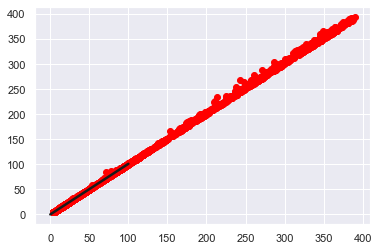

In [96]:
plt.scatter(x3,y3,color='red')
b,a=np.polyfit(x3.values.reshape(3872),y3.values.reshape(3872),deg=1)
xseq=np.linspace(0,100, num=100)
plt.plot(xseq,a + b * xseq,color='k',lw=2.5);